In [1]:
#in His Name"

نصب و فراخوانی ماژول‌های 
- `numpy` برای انجام عملیات آرایه‌ای
- `matplotlib` برای تصویر سازی داده
- `sklearn` برای استفاده از توابع موردنیاز برای تبدیل
- `mpld3` برای تصویرسازی تعاملی داده

In [11]:
!pip install numpy
!pip install matplotlib==2.0.2
!pip install sklearn
!pip install mpld3

^C


    ERROR: Command errored out with exit status 1:
     command: 'c:\users\keivan\appdata\local\programs\python\python37\python.exe' -c 'import sys, setuptools, tokenize; sys.argv[0] = '"'"'C:\\Users\\Keivan\\AppData\\Local\\Temp\\pip-install-cjsr_d9i\\matplotlib_816a175ebc4b438ebb46c9a3180eb4bb\\setup.py'"'"'; __file__='"'"'C:\\Users\\Keivan\\AppData\\Local\\Temp\\pip-install-cjsr_d9i\\matplotlib_816a175ebc4b438ebb46c9a3180eb4bb\\setup.py'"'"';f=getattr(tokenize, '"'"'open'"'"', open)(__file__);code=f.read().replace('"'"'\r\n'"'"', '"'"'\n'"'"');f.close();exec(compile(code, __file__, '"'"'exec'"'"'))' egg_info --egg-base 'C:\Users\Keivan\AppData\Local\Temp\pip-pip-egg-info-vjrmml0n'
         cwd: C:\Users\Keivan\AppData\Local\Temp\pip-install-cjsr_d9i\matplotlib_816a175ebc4b438ebb46c9a3180eb4bb\
    Complete output (63 lines):
    Edit setup.cfg to change the build options
    
    BUILDING MATPLOTLIB
                matplotlib: yes [2.0.2]
                    python: yes [3.7.5 (tags

In [12]:
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.colors
from sklearn import datasets

import mpld3
from mpld3 import plugins

دسترسی به مجموعه داده اعداد دست نویس

In [4]:
digits = datasets.load_digits()

In [5]:
x = digits.data
y = digits.target

اعمال تبدیل  
TSNE نکته مهم درباره تابع 
- `init='pca'`
- `random_state=0`

`این دو ورودی از تابع را با مقادیر مشخص شده، مقداردهی نمایید`

In [6]:
def tsne(x):
    x_tsne = TSNE(n_components=2, init='pca', random_state=0).fit_transform(x)
    return x_tsne

In [7]:
x_tsne = tsne(x)

رسم نمودار داده بعد از اعمال تبدیل

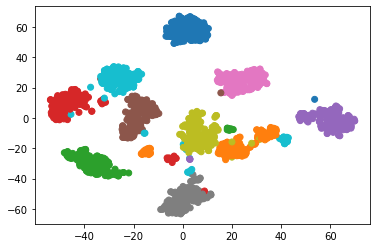

In [8]:
colors = list(matplotlib.colors.TABLEAU_COLORS)

label_colors = []
for idx in y:
    label_colors.append(colors[idx])
    
plt.scatter(x_tsne[:,0], x_tsne[:,1], c=label_colors)

رسم نمودار تعاملی داده بعد از اعمال تبدیل

In [9]:
x_for_plot = []
for i in range(10):
    x_for_plot.append(x_tsne[y==i])

NameError: name 'plugins' is not defined

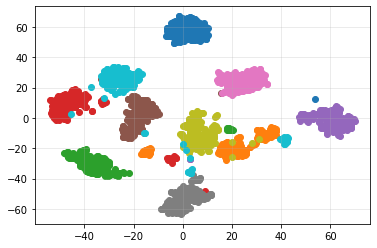

In [10]:
fig, ax = plt.subplots()
ax.grid(True, alpha=0.3)


for i in range(10):
    ax.scatter(x_for_plot[i][:,0], x_for_plot[i][:,1], c=label_colors[i], label=i)
    
#define interactive legend

handles, labels = ax.get_legend_handles_labels() # return lines and labels
interactive_legend = plugins.InteractiveLegendPlugin(zip(handles,
                                                         ax.collections),
                                                     labels,
                                                     alpha_unsel=0.5,
                                                     alpha_over=1.5, 
                                                     start_visible=True)

plugins.connect(fig, interactive_legend)


mpld3.enable_notebook()
mpld3.display()

In [ ]:
import zlib
import zipfile


def compress(file_names):
    print("File Paths:")
    print(file_names)

    # Select the compression mode ZIP_DEFLATED for compression
    # or zipfile.ZIP_STORED to just store the file
    compression = zipfile.ZIP_DEFLATED

    # create the zip file first parameter path/name, second mode
    with zipfile.ZipFile("result.zip", mode="w") as zf:
        for file_name in file_names:
            # Add file to the zip file
            # first parameter file to zip, second filename in zip
            zf.write('./' + file_name, file_name, compress_type=compression)


file_names = ["functions.py", "solution.ipynb"]
compress(file_names)
